In [ ]:
import pandas as pd


In [ ]:
path = '/content/drive/MyDrive/ML projects/decision tree/winequality-red.csv'

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
for i in range(len(data['quality'])):
  if data['quality'][i]<6.5:
    data['quality'][i] =0 #bad
  else:
    data['quality'][i] =1 #good according kaggle problem statement

data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(1599, 12)

In [ ]:
feature = data.iloc[:,0:10]
label= data.iloc[:,11]

In [ ]:
from sklearn.model_selection import train_test_split
trainF,testF,trainL,testL = train_test_split(feature,label ,test_size = .2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth= 3)

In [ ]:
model.fit(trainF,trainL)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred= model.predict(testF)
model.classes_

array([0, 1])

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(pred,testL,target_names =['0','1']))
cm = confusion_matrix(testL,pred)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       302
           1       0.29      0.56      0.38        18

    accuracy                           0.90       320
   macro avg       0.63      0.74      0.66       320
weighted avg       0.93      0.90      0.91       320



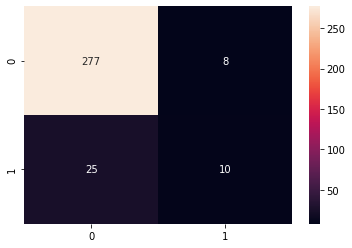

In [111]:
import seaborn as sns

sns.heatmap(cm,annot=True,fmt='d')

